In [246]:
import numpy as np
import pandas as pd
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols


pathcars = pd.read_csv("../Ai22Statistik/data/cars.csv")
df = pd.DataFrame(pathcars)
df = df.dropna() # Plocka bort rader som innehåller NaN

In [248]:
#super basic exploartion

print("us cars")
print(df_usa_cars["model_year"].max())
print(df_usa_cars["model_year"].min())


print("eu cars")
print(df_eu_cars["model_year"].max())
print(df_eu_cars["model_year"].min())

us cars
82
70
eu cars
82
70


In [249]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger



Uppdrag: Jag vill undersöka Medelvärde, median och standardavvikelse. 

### *Frågeställning*: 
Hur utvecklas bilar med tiden gällande energieffektivtet. Skiljer sig europeiska bilar från amerikanska?

#### Hypotes
Amerikanska bilar kommer ha en genomsnittlig högre bränsleförbrukning men också mer hästkrafter

$$\overline{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$




In [360]:
""" Jag använder mig av mean funktionen. man tar n vilket är antalet rader, 
    och adderar alla värden i int/float kolumn och därefter divderar n """

#skapar condition för dataframe
eu_orgin_con = ["europe"]
usa_orgin_con = ["usa"]

#skapar dataframe med condition
df_usa_cars = df[df["origin"].isin(usa_orgin_con)]
df_eu_cars = df[df["origin"].isin(eu_orgin_con)]


#kollar värden för eu bilar
print(df_eu_cars["mpg"].mean())
print(df_eu_cars["horsepower"].mean())

27.89142857142857
80.55882352941177


In [361]:
#kollar värden för us bilar
print(df_usa_cars["mpg"].mean())
print(df_usa_cars["horsepower"].mean())

20.083534136546184
119.04897959183674


In [362]:
#kollar medianen för eu och us bilar
print(df_usa_cars["mpg"].median())
print(df_eu_cars["mpg"].median())

18.5
26.5


In [265]:
#gör ett condition för att dela tolv år i 3 delar
yearcon_early = [70,71,73,74] 
yearcon_mid = [75,76,77,78]
yearcon_late = [79,80,81,82]



# vi skapar 3 data frames med åren vårat condition 
df_year_early = df[df["model_year"].isin(yearcon_early)]
df_year_mid = df[df["model_year"].isin(yearcon_mid)]
df_year_late = df[df["model_year"].isin(yearcon_late)]


#Här kollar vi medelvärdet för varje tredjedel 

print(df_year_early["horsepower"].mean())
print(df_year_mid["horsepower"].mean())
print(df_year_late["horsepower"].mean())

print("-----------------------------------")
#vi gör likadant för MPG 
print(df_year_early["mpg"].mean())
print(df_year_mid["mpg"].mean())
print(df_year_late["mpg"].mean())



121.68852459016394
101.5703125
85.43859649122807
-----------------------------------
19.33606557377049
22.3609375
30.224561403508773


In [297]:
#låt oss kolla om bilar blir mindre med tiden
print(df_year_early["weight"].mean())
print(df_year_mid["weight"].mean())
print(df_year_late["weight"].mean())
print(".................")

#låt oss också kolla motorvolymen 
print(df_year_early["displacement"].mean())
print(df_year_mid["displacement"].mean())
print(df_year_late["displacement"].mean())

3206.77868852459
3022.90625
2617.5263157894738
.................
234.81967213114754
192.5859375
147.33333333333334


### Vi ser en generell utveckling för mindre hästkrafter i utbytte mot mer energieffektiva motorer mellan åren 1970 till 1982

låt oss visualisera denna utvecklingen

C:\Users\maxim\AppData\Local\Temp\ipykernel_13604\3044469453.py:12: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



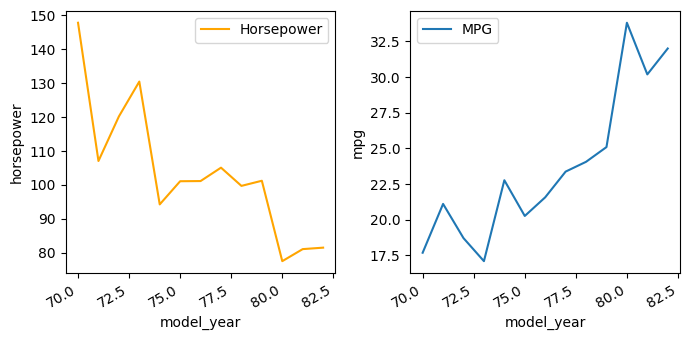

In [254]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2,) # skapar två fönster

#ålottar datan
sns.lineplot(x="model_year", y="horsepower", data=df, errorbar=None, ax=ax[0], label = "Horsepower", color = "orange")
sns.lineplot(x="model_year", y="mpg", data=df,  errorbar=None, ax=ax[1], label = "MPG")

fig.autofmt_xdate()
fig.show()
# sns.regplot(x="horsepower", y="mpg", data=df, ax=[2])

<AxesSubplot: xlabel='model_year', ylabel='mpg'>

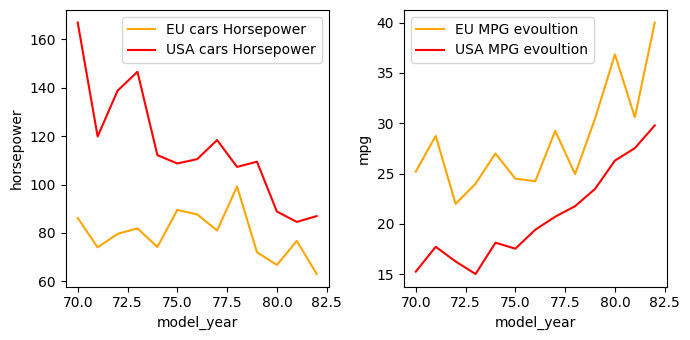

In [285]:
# låt oss jämnföra hur utveckling var mellan USA och Europa 
fig, ax = plt.subplots(1, 2,)
sns.lineplot(x="model_year", y="horsepower", data=(df_eu_cars), errorbar=None,  label = "EU cars Horsepower", color = "orange", ax=ax[0] )
sns.lineplot(x="model_year", y="horsepower", data=(df_usa_cars), errorbar=None, label = "USA cars Horsepower", color = "red", ax=ax[0] )

sns.lineplot(x="model_year", y="mpg", data=(df_eu_cars), errorbar=None,  label = "EU MPG evolution", color = "orange", ax=ax[1] )
sns.lineplot(x="model_year", y="mpg", data=(df_usa_cars), errorbar=None, label = "USA MPG evolution", color = "red", ax=ax[1] )

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

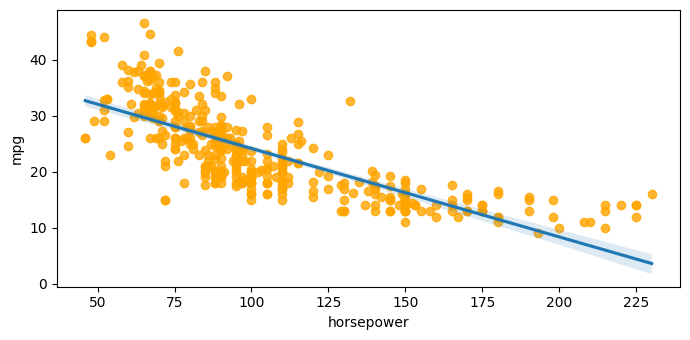

In [272]:
# På denna plot kan vi se att det finns en korrelation  mellan hästkrafter och bränsleförbrukning
sns.regplot(x="horsepower", y="mpg", data=df, scatter_kws={"color": "orange"})

## Slutsats 
Vi kan se en prioritering för en mer energieffektiv bil. Detta är förmodligen på grund av oljekrisen 1979, vilket passar resultaten.
 
yearcon_late innebär åren  79, 80, 81 och 82. Vi har kollat: medelvärdet. Medelvärdet för vikt, motorstorlek samt motorvolym. Vilket visar i helhet en trend för en energieffektiv bil i utbyte mot vikt, hästkrafter och motorstorlek 

Vi ser också att den europeiska bilen är i genomsnittligen mer energieffektiv men också har i regel mindre hästkrafter 



 (s) = √(∑(x - x̄)² / n)

Standard deviation of mpg: 7.815984312565782
Standard deviation of horsepower: 38.49115993282849


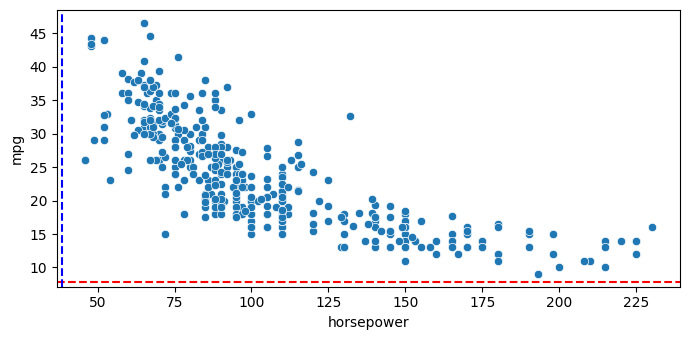

In [314]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#låt oss kolla på  på standardavvikelse för att sätta ditt poängen och en till 
# tjusig polot


# räknar ut standard deviation
mpg_stddev = df["mpg"].std()
hp_stddev = df["horsepower"].std()

# Printar reslutatetet
print("Standard deviation of mpg:", mpg_stddev)
print("Standard deviation of horsepower:", hp_stddev)

# gör en scatter plot
sns.scatterplot(x="horsepower", y="mpg", data=df)

# lägger till en tjusig linje för x-axeln
plt.axhline(y=mpg_stddev, color='red', linestyle='--')

# lägger till en tjusig linje för y-axeln
plt.axvline(x=hp_stddev, color='blue', linestyle='--')

# Show the plot
plt.show()

## Hypotestest

Fråga:

Är det en skilland mellan energieffektivetetn mellan 4 och 8 cylindrar 

* Nullhypotes (H0): Medelvärdet för bränsleekonomi hos bilar med 4 och 8 cylindrar är detsamma.

* Alternativ hypotes (Ha): Medelvärdet för bränsleekonomi hos bilar med 4 och 8 cylindrar är olika.

t = (x̄1 - x̄2) / (s₁²/n₁ + s₂²/n₂)^0.5

In [352]:
import scipy.stats as stats
#låt oss göra ett t-test

four_cyl = df[df["cylinders"] == 4]["mpg"]

eight_cyl = df[df["cylinders"] == 8]["mpg"]


t_stat, p_value = stats.ttest_ind(four_cyl, eight_cyl, equal_var=False, alternative="two-sided") 
print(t_stat)
print(p_value)


#Med detta p-värde kan vi förkasta nollhypotesen (H0) 
#och därmed säga att bränsleekonomi hos bilar med 4 och 8 cylindrar är olika.


29.36466000454742
6.96499988801485e-91


## låt oss visualisera detta

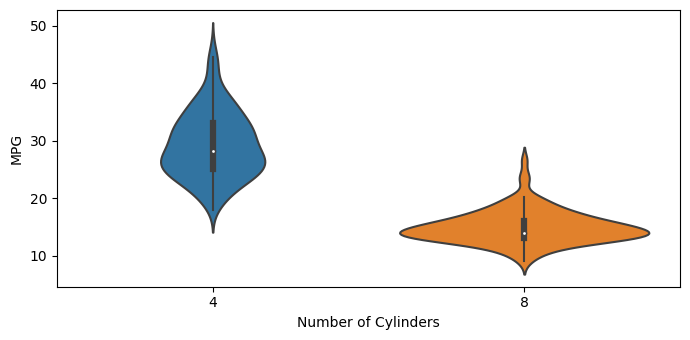

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


# slår i hop four_cyl och eight_cyl
data = pd.concat([four_cyl, eight_cyl])

# gör en violinplot 
sns.violinplot(x="Cylinders", y="MPG", data=data)
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")
plt.show()



## Låt oss göra ett konfidensintervall

### fråga 
Vad är 95% konfidensintervallet för medelbränsleförbrukningen för fordon med 4 cylindrar?



In [359]:
#four cyl std och medelvärde
mean = four_cyl.mean()
std = four_cyl.std()

#
se = std / np.sqrt(len(four_cyl)) # standard error of the mean 


t_crit = stats.t.ppf(0.975, df=len(four_cyl) - 1) # t värdett

lower_bound = mean - t_crit * se #lägreintervall
upper_bound = mean + t_crit * se # högreintervall

print(f"SVAR: 95% konfidensintervallet för medelvärdet av mpg för fordon med 4 cylindrar är ({lower_bound:.2f}, {upper_bound:.2f})")

SVAR: 95% konfidensintervallet för medelvärdet av mpg för fordon med 4 cylindrar är (28.50, 30.08)
